# Ciência dos Dados - Projeto 1
Lucas Ohara

# Pergunta a ser respondida

Países Sul-Americanos paricipantes do Mercosul tem taxa de exportação mais elevada que aqueles que não participam do bloco? Ainda, considerando que as exportações de produto primário são grande parte das exportações Sul-Americanas, países com taxa de exportação elevada possuem menor IDH?

# Explicação
O mercosul é o bloco econômico Sul-Americano composto por Brasil, Paraguay, Uruguay, Venezuela e Argentina. Configura-se como uma  união aduaneira, na qual há livre comércio intrazona e política comercial comum entre os países-membros, um grande facilitador para relações comerciais com os mesmos. A vasta exportação de produtos primários proveniente de países Mercosul é responsável por boa parte do comércio internacional dos mesmos. Por exemplo, os países do Mercosul formam o maior bloco exportador de alimentos no mundo. Porém, países com alta taxa de exportação de produtos do setor primário e baixa taxa de exportação de produtos do setor secundário indicam baixo desenvolvimento tecnológico da indústria. 
Perante isso, a análise a ser realizada consiste na investigação dos dados recolhidos, baseada na hipótese:

# Pergunta a ser respondida

Países Sul-Americanos paricipantes do Mercosul tem taxa de exportação mais elevada que aqueles que não participam do bloco? Ainda, considerando que as exportações de produto primário são grande parte das exportações Sul-Americanas, países com taxa de exportação elevada possuem menor IDH?

# Dados

https://www.gapminder.org/data/ , palavras chave: "HDI", "Exports (p of GDP)"

http://www.mercosul.gov.br/saiba-mais-sobre-o-mercosul


In [81]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
#imporatndo bibliotecas

Dados do IDH de países Sul-Americanos

In [82]:
dados_DKM = pd.read_excel('Indicator_HDI.xlsx')
dados_IDH = dados_DKM.loc[:,["country",(2005)]]
dados_IDH.head(12)
#leitura dos dados de IDH

,country,2005
0,Argentina,0.765
1,Bolivia,0.649
2,Brazil,0.692
3,Chile,0.779
4,Colombia,0.675
5,Ecuador,0.695
6,Paraguay,0.635
7,Peru,0.691
8,Uruguay,0.748
9,Venezuela,0.692


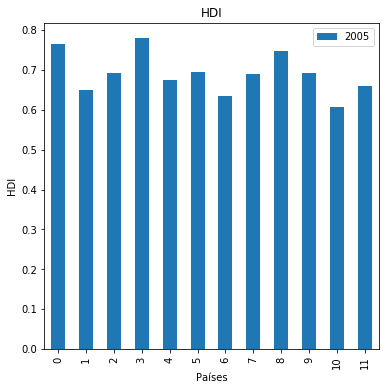

In [83]:
plot = dados_IDH.plot(kind='bar',title='HDI',figsize=(6, 6),)
plt.ylabel('HDI')
plt.xlabel('Países')
plt.show()

In [84]:
dados_REI = pd.read_excel('Exports (p of GDP).xlsx')
#leitura dos dados de exportação, % do PiB
dados_GDP = dados_REI.loc[:,["country","2005"]]
dados_GDP.head(20)
#filtro das colunas


,country,2005
0,Argentina,25.067933
1,Bolivia,35.548143
2,Brazil,15.128351
3,Chile,38.382370
4,Colombia,16.849916
5,Ecuador,30.904340
6,Paraguay,50.236974
7,Peru,25.089326
8,Uruguay,30.404020
9,Venezuela,39.658653


Dados de % do PiB em exportação dos mesmos países.

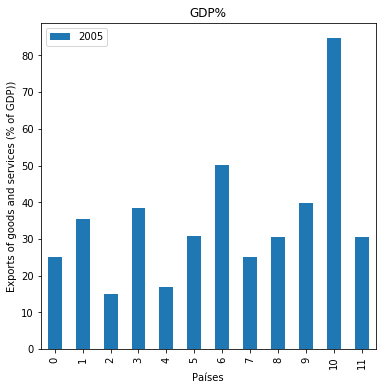

In [85]:
plot = dados_GDP.plot(kind='bar',title='GDP%',figsize=(6, 6),)
plt.ylabel('Exports of goods and services (% of GDP))')
plt.xlabel('Países')
plt.show()

# JOIN
União dos dados coletados em uma tabela única, o MERGE.

In [86]:
IDH_idx = dados_IDH.set_index('country')
GDP_idx = dados_GDP.set_index('country')
IDH_GDP = IDH_idx.join(GDP_idx, how='inner', lsuffix='_IDH', rsuffix='_GDP')
IDH_GDP.head(12)
#Junta os bancos de dados 

,2005,2005
country,,
Argentina,0.765,25.067933
Bolivia,0.649,35.548143
Brazil,0.692,15.128351
Chile,0.779,38.382370
Colombia,0.675,16.849916
Ecuador,0.695,30.904340
Paraguay,0.635,50.236974
Peru,0.691,25.089326
Uruguay,0.748,30.404020


# Adicionando coluna qualitativa

Agora que o MERGE foi realizado, pode-se fazer uma avaliação qualitativa dos dados. Para isso, será adicionada uma terceira coluna que indica os países que fazem parte do Mercosul, e aqueles não participantes.

In [87]:
IDH_GDP['Mercosul'] = 'Nao_Participante'
lista_Mercosul = ['Brazil', 'Venezuela', 'Uruguay', 'Paraguay', 'Argentina']
IDH_GDP.loc[lista_Mercosul, 'Mercosul'] = 'Participante'
IDH_GDP.head(12)

,2005,2005,Mercosul
country,,,
Argentina,0.765,25.067933,Participante
Bolivia,0.649,35.548143,Nao_Participante
Brazil,0.692,15.128351,Participante
Chile,0.779,38.382370,Nao_Participante
Colombia,0.675,16.849916,Nao_Participante
Ecuador,0.695,30.904340,Nao_Participante
Paraguay,0.635,50.236974,Participante
Peru,0.691,25.089326,Nao_Participante
Uruguay,0.748,30.404020,Participante
